In [1]:
from pyVisDifftools.visdiff import VisDiff
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import itertools

In [2]:
dataDir='.'
dataType='train'
annFile='%s/dataset/visdiff_%s.json'%(dataDir,dataType)

In [3]:
# initialize VisDiff api for instance annotations
visdiff=VisDiff(annFile)

There are total 4700 pairs in train set


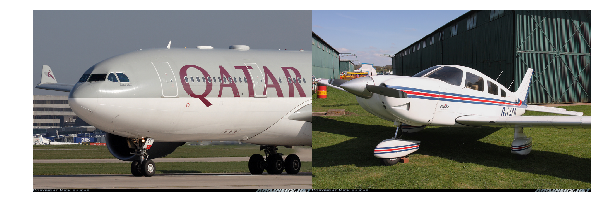

commercial plane _vs_ private plane
large plane _vs_ small plane
white and grey _vs_ white with blue and red stripes
twin engines _vs_ single engine
more windows on body _vs_ less windows on body


In [7]:
# load and display paired caption annotations
from skimage.transform import resize
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Each pair has 1 pair of images and 5 pairs of attribute phrases
print 'There are total %s pairs in %s set'%(str(len(visdiff.dataset['annotations'])),dataType)

rndId = np.random.randint(0,len(visdiff.dataset['annotations']))
anns = visdiff.loadAnns(rndId)

imgId1 = anns[0]['img1_id']
imgId2 = anns[0]['img2_id']
I1 = io.imread('dataset/images/%s.jpg'%(imgId1))
I2 = io.imread('dataset/images/%s.jpg'%(imgId2))
I1 = resize(I1, (650,1000))
I2 = resize(I2, (650,1000))
plt.figure(); plt.axis('off')
plot_image = np.concatenate((I1, I2), axis=1)
plt.imshow(plot_image)
plt.show()

visdiff.showAnns(anns)

In [8]:
anns[0]

{u'id': 4591,
 u'img1_id': u'1532637',
 u'img2_id': u'1704089',
 u'sentences1': [u'commercial plane',
  u'large plane',
  u'white and grey',
  u'twin engines',
  u'more windows on body'],
 u'sentences2': [u'private plane',
  u'small plane',
  u'white with blue and red stripes',
  u'single engine',
  u'less windows on body']}

In [5]:
print(anns[0])

{u'img2_id': u'2006049', u'img1_id': u'1706498', u'sentences2': [u'private plane', u'no logo on body', u'single engine', u'propeller engine', u'non adjustable landing gear'], u'id': 2201, u'sentences1': [u'commercial jet', u'logo on body', u'twin engine', u'turbofan engine', u'adjustable landing gear']}


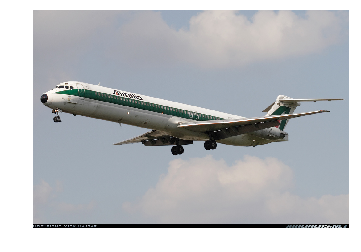

bigger in size
black nose
commercial aircraft
commercial plane
commercial plane
commercial plane
engine fitted to the body and below the tail
facing left
facing left
facing left
flying
flying in the air
green stripe
green tail design
in the air
in the air
italian
jet
jetliner
large jet
low-wing
multiple windows
non visable jet engines
sidder door
six wheels
snub nose
turbo engine
turbo engine plane
turbofan engine
twin turbo engine
white
white color
white colour with green band
with logo
without missile


In [6]:
# Display all attribute phrases of one image
# Note that each phrases is generated by comparing with another image, as they may contain some relative attribute.
rndId = np.random.randint(0,len(visdiff.dataset['img_all_id']))
imgId = visdiff.dataset['img_all_id'][rndId]
pylab.rcParams['figure.figsize'] = (6.0, 4.0)
I = io.imread('dataset/images/%s.jpg'%(imgId))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()
anns = sorted(list(itertools.chain.from_iterable(visdiff.imgToAnns[imgId])))
for ann in anns:
    print str(ann)